In [1]:
import sys,os
print(os.path.abspath('../../..'))
sys.path.insert(0, os.path.abspath('../../..'))

from lcs import Perception

/home/tigra/Norbert/pyalcs


In [2]:
%matplotlib inline

# Logger
import logging
logging.basicConfig(level=logging.INFO)

import matplotlib
import matplotlib.pyplot as plt

# Import local paths
import sys, os
sys.path.insert(0, os.path.abspath('..'))
sys.path.insert(0, os.path.abspath('../../openai-envs'))

# Enable automatic module reload
%load_ext autoreload
%autoreload 2

# Load PyALCS module
from lcs import Perception
from lcs.metrics import population_metrics
from lcs.agents.acs2 import ACS2, Configuration, ClassifiersList

# Load environments
import gym
import gym_grid

# Grid

Actions:

    MOVE_LEFT = 0
    MOVE_RIGHT = 1
    MOVE_UP = 2
    MOVE_DOWN = 3


In [3]:
# collect more metrics
def grid_metrics(pop, env):
    metrics = {}
    metrics.update(population_metrics(pop, env))
    return metrics

In [4]:
cfg = Configuration(
        classifier_length=2,
        number_of_possible_actions=4,
        epsilon=1.0,
        beta=0.03,
        gamma=0.97,
        theta_i=0.05,
        theta_as=10,
        theta_exp=50,
        theta_ga=50,
        do_ga=True,
        mu=0.04,
        u_max=2,
        metrics_trial_frequency=1,
        user_metrics_collector_fcn=grid_metrics)

In [5]:
def print_cl(cl):
    action = None
    if cl.action == 0:
        action = '⬅'
    if cl.action == 1:
        action = '➡'
    if cl.action == 2:
        action = '⬆'
    if cl.action == 3:
        action = '⬇'
    print(f"{cl.condition} - {action} - {cl.effect} [fit: {cl.fitness:.3f}, r: {cl.r:.2f}, ir: {cl.ir:.2f}], exp: {cl.exp}")

In [6]:
def print_simple_stats(population, metrics):
    pop_size = len(population)
    
    # avg step in trial
    steps = []
    for m in metrics:
        steps.append(m['steps_in_trial'])

    print(f"Population of {pop_size}, avg steps {sum(steps)/len(steps)}, all steps {sum(steps)}")     

In [7]:
def plot_population(metrics, ax=None):
    if ax is None:
        ax = plt.gca()
        
    trials = [m['trial'] for m in metrics]
    
    population_size = [m['numerosity'] for m in metrics]
    reliable_size = [m['reliable'] for m in metrics]
    
    ax.plot(trials, population_size, 'b', label='all')
    ax.plot(trials, reliable_size, 'r', label='reliable')
    
    ax.set_title("Population size")
    ax.set_xlabel("Trial")
    ax.set_ylabel("Number of macroclassifiers")
    ax.legend(loc='best')

## Grid

### Exploration

In [8]:
gridsize = 9
explore_steps=3000
exploit_steps=3000

grid = gym.make('grid-20-v0')

grid.env._size = gridsize
grid.env.REWARD = 2000
grid._max_episode_steps = 2600

In [9]:
%%time
agent = ACS2(cfg)
population, metrics = agent.explore(grid, explore_steps)

INFO:lcs.agents.Agent:{'trial': 0, 'steps_in_trial': 97, 'reward': 2000, 'population': 31, 'numerosity': 38, 'reliable': 0}
INFO:lcs.agents.Agent:{'trial': 100, 'steps_in_trial': 78, 'reward': 2000, 'population': 36, 'numerosity': 324, 'reliable': 36}
INFO:lcs.agents.Agent:{'trial': 200, 'steps_in_trial': 2, 'reward': 2000, 'population': 36, 'numerosity': 324, 'reliable': 36}
INFO:lcs.agents.Agent:{'trial': 300, 'steps_in_trial': 193, 'reward': 2000, 'population': 36, 'numerosity': 324, 'reliable': 36}
INFO:lcs.agents.Agent:{'trial': 400, 'steps_in_trial': 266, 'reward': 2000, 'population': 36, 'numerosity': 324, 'reliable': 36}
INFO:lcs.agents.Agent:{'trial': 500, 'steps_in_trial': 472, 'reward': 2000, 'population': 36, 'numerosity': 324, 'reliable': 36}
INFO:lcs.agents.Agent:{'trial': 600, 'steps_in_trial': 1476, 'reward': 2000, 'population': 36, 'numerosity': 324, 'reliable': 36}
INFO:lcs.agents.Agent:{'trial': 700, 'steps_in_trial': 584, 'reward': 2000, 'population': 36, 'numerosit

CPU times: user 5min 30s, sys: 627 ms, total: 5min 31s
Wall time: 5min 30s


In [10]:
print_simple_stats(population, metrics)

Population of 36, avg steps 330.917, all steps 992751


In [11]:
for cl in sorted(population, key=lambda cl: -cl.fitness):
    if cl.does_anticipate_change():
        print_cl(cl)

8# - ➡ - 9# [fit: 1188.826, r: 1188.83, ir: 187.98], exp: 22702
#8 - ⬆ - #9 [fit: 1154.131, r: 1154.13, ir: 131.23], exp: 22623
7# - ➡ - 8# [fit: 1138.787, r: 1138.79, ir: 0.00], exp: 24919
9# - ⬅ - 8# [fit: 1137.242, r: 1137.24, ir: 0.00], exp: 20029
#7 - ⬆ - #8 [fit: 1123.910, r: 1123.91, ir: 0.00], exp: 24932
#9 - ⬇ - #8 [fit: 1118.348, r: 1118.35, ir: 0.00], exp: 19920
6# - ➡ - 7# [fit: 1109.573, r: 1109.57, ir: 0.00], exp: 26925
8# - ⬅ - 7# [fit: 1107.160, r: 1107.16, ir: 0.00], exp: 22584
#6 - ⬆ - #7 [fit: 1102.289, r: 1102.29, ir: 0.00], exp: 26893
#8 - ⬇ - #7 [fit: 1100.066, r: 1100.07, ir: 0.00], exp: 22556
#7 - ⬇ - #6 [fit: 1086.802, r: 1086.80, ir: 0.00], exp: 24873
#5 - ⬆ - #6 [fit: 1086.713, r: 1086.71, ir: 0.00], exp: 28420
7# - ⬅ - 6# [fit: 1084.907, r: 1084.91, ir: 0.00], exp: 24909
5# - ➡ - 6# [fit: 1084.079, r: 1084.08, ir: 0.00], exp: 28691
#3 - ⬆ - #4 [fit: 1078.653, r: 1078.65, ir: 0.00], exp: 30783
#2 - ⬆ - #3 [fit: 1078.135, r: 1078.14, ir: 0.00], exp: 31629
#4 -

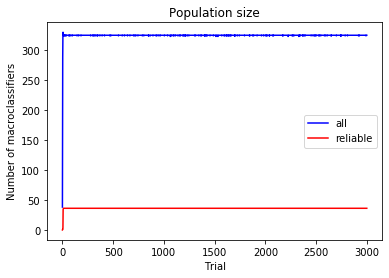

In [12]:
plot_population(metrics)

### Exploitation

In [13]:
%%time
agent = ACS2(cfg, population)
pop_exploit, metric_exploit = agent.exploit(grid, exploit_steps)

INFO:lcs.agents.Agent:{'trial': 0, 'steps_in_trial': 221, 'reward': 2000, 'population': 36, 'numerosity': 324, 'reliable': 36}
INFO:lcs.agents.Agent:{'trial': 100, 'steps_in_trial': 222, 'reward': 2000, 'population': 36, 'numerosity': 324, 'reliable': 36}
INFO:lcs.agents.Agent:{'trial': 200, 'steps_in_trial': 1013, 'reward': 2000, 'population': 36, 'numerosity': 324, 'reliable': 36}
INFO:lcs.agents.Agent:{'trial': 300, 'steps_in_trial': 2600, 'reward': 0, 'population': 36, 'numerosity': 324, 'reliable': 36}
INFO:lcs.agents.Agent:{'trial': 400, 'steps_in_trial': 690, 'reward': 2000, 'population': 36, 'numerosity': 324, 'reliable': 36}
INFO:lcs.agents.Agent:{'trial': 500, 'steps_in_trial': 95, 'reward': 2000, 'population': 36, 'numerosity': 324, 'reliable': 36}
INFO:lcs.agents.Agent:{'trial': 600, 'steps_in_trial': 2600, 'reward': 0, 'population': 36, 'numerosity': 324, 'reliable': 36}
INFO:lcs.agents.Agent:{'trial': 700, 'steps_in_trial': 2600, 'reward': 0, 'population': 36, 'numerosity

CPU times: user 12min 20s, sys: 183 ms, total: 12min 20s
Wall time: 12min 20s


In [14]:
print_simple_stats(pop_exploit, metric_exploit)

Population of 36, avg steps 1879.2906666666668, all steps 5637872


In [15]:
for cl in sorted(population, key=lambda cl: -cl.fitness):
    if cl.does_anticipate_change():
                print_cl(cl)

8# - ➡ - 9# [fit: 482.607, r: 482.61, ir: 423.78], exp: 22702
6# - ➡ - 7# [fit: 363.444, r: 363.44, ir: 0.00], exp: 26925
7# - ➡ - 8# [fit: 342.949, r: 342.95, ir: 0.00], exp: 24919
5# - ➡ - 6# [fit: 331.651, r: 331.65, ir: 0.00], exp: 28691
4# - ➡ - 5# [fit: 172.608, r: 172.61, ir: 0.00], exp: 30061
#7 - ⬆ - #8 [fit: 145.061, r: 145.06, ir: 0.00], exp: 24932
#6 - ⬆ - #7 [fit: 99.675, r: 99.67, ir: 0.00], exp: 26893
#5 - ⬆ - #6 [fit: 85.665, r: 85.67, ir: 0.00], exp: 28420
#4 - ⬆ - #5 [fit: 80.869, r: 80.87, ir: 0.00], exp: 29588
#3 - ⬆ - #4 [fit: 73.577, r: 73.58, ir: 0.00], exp: 30783
#2 - ⬆ - #3 [fit: 57.584, r: 57.58, ir: 0.00], exp: 31629
#1 - ⬆ - #2 [fit: 28.766, r: 28.77, ir: 0.00], exp: 32457
#9 - ⬇ - #8 [fit: 4.359, r: 4.36, ir: 0.00], exp: 19920
#8 - ⬆ - #9 [fit: 4.230, r: 4.23, ir: 0.00], exp: 22623
8# - ⬅ - 7# [fit: 0.001, r: 0.00, ir: 0.00], exp: 22584
7# - ⬅ - 6# [fit: 0.001, r: 0.00, ir: 0.00], exp: 24909
#8 - ⬇ - #7 [fit: 0.001, r: 0.00, ir: 0.00], exp: 22556
#7 - ⬇ - #

### Manual tests

In [16]:
state = Perception(("1","1"))

match = population.form_match_set(state)
for cl in sorted(match, key=lambda cl: -cl.fitness):
        if cl.does_anticipate_change():
            print_cl(cl)
#         else:
#             print_cl(cl)

#1 - ⬆ - #2 [fit: 28.766, r: 28.77, ir: 0.00], exp: 32457
1# - ➡ - 2# [fit: 0.001, r: 0.00, ir: 0.00], exp: 32073


In [17]:
import random

def find_best_moves(population, state):
    def best_fitness(match_set, action):
        action_set = match_set.form_action_set(action)
        random.shuffle(action_set)  # in case there are many actions available
        best_cl = max(action_set, key=lambda cl: cl.fitness)
        return best_cl.fitness*best_cl.num
    
    matching = population.form_match_set(state)
    
    return {
        "left": best_fitness(matching, 0),
        "right": best_fitness(matching, 1),
        "up": best_fitness(matching, 2),
        "down": best_fitness(matching, 3)
        
    }

find_best_moves(population, Perception(("3", "2")))

{'left': 0.011757412183896226,
 'right': 0.0117523331041429,
 'up': 518.257702407428,
 'down': 0.011786837538803347}

In [18]:
dim = gridsize
step = 1. / dim

states = []

for x in range(0, dim):
    for y in range(0, dim):
        states.append({
            "pos": (x * step, y * step),
            "cord": (x+1, y+1),
            "best": find_best_moves(population, Perception((str(x+1), str(y+1))))
        })

# show first one
states[:1]

[{'pos': (0.0, 0.0),
  'cord': (1, 1),
  'best': {'left': 0.0,
   'right': 0.011756376079737977,
   'up': 258.8907736205926,
   'down': 0.0}}]

In [19]:
states[2]

{'pos': (0.0, 0.2222222222222222),
 'cord': (1, 3),
 'best': {'left': 0.0,
  'right': 0.011756376079737977,
  'up': 662.1891095125184,
  'down': 0.01149563178297905}}

In [20]:
from itertools import chain

fitness_values = set()
for s in states:
    for v in s['best'].values():
        fitness_values.add(v)

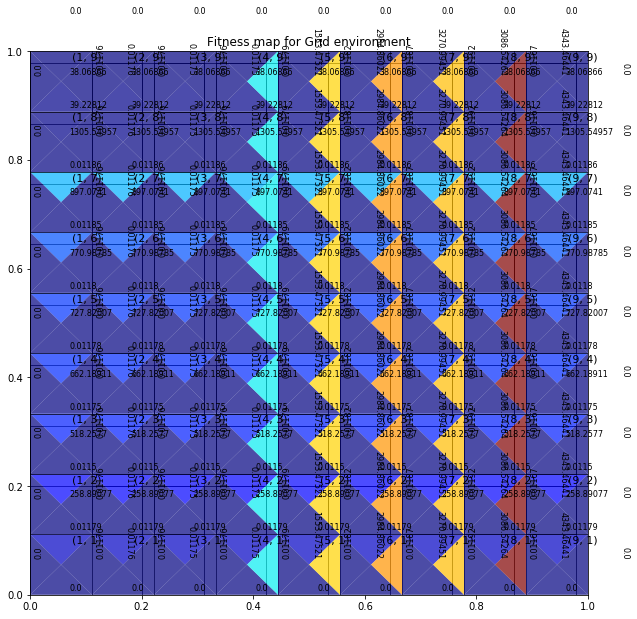

In [21]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.colors as colors
import matplotlib.cm as cmx


cm = plt.get_cmap('jet')
cNorm  = colors.Normalize(vmin=min(fitness_values), vmax=max(fitness_values))
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)


fig, ax = plt.subplots(1, figsize=(10,10))

ax.set_title('Fitness map for Grid environment')
for state in states:
    (pos_x, pos_y) = state['pos']
    rect = patches.Rectangle((pos_x, pos_y), .2, .2, linewidth=1, edgecolor='black', facecolor='none', alpha=.7)
    
    alpha_triangles = 0.7
    
    down = plt.Polygon([(pos_x, pos_y), (pos_x+step, pos_y), (pos_x+step/2, pos_y+step/2)],
                       color=scalarMap.to_rgba(state['best']['down']),
                       alpha=alpha_triangles,linewidth=0)
    up = plt.Polygon([(pos_x, pos_y+step), (pos_x+step, pos_y+step), (pos_x+step/2, pos_y+step/2)],
                     color=scalarMap.to_rgba(state['best']['up']),
                     alpha=alpha_triangles, linewidth=0)
    left = plt.Polygon([(pos_x, pos_y), (pos_x, pos_y+step), (pos_x+step/2, pos_y+step/2)],
                     color=scalarMap.to_rgba(state['best']['left']),
                     alpha=alpha_triangles, linewidth=0)
    right = plt.Polygon([(pos_x+step, pos_y), (pos_x+step, pos_y+step), (pos_x+step/2, pos_y+step/2)],
                     color=scalarMap.to_rgba(state['best']['right']),
                     alpha=alpha_triangles, linewidth=0)
    
    plt.text(pos_x+.075, pos_y+.095, state['cord'], fontsize=11)  # cords
    
    plt.text(pos_x+.07, pos_y+0.008,
             round(state['best']['down'], 5),
             fontsize=8)
    plt.text(pos_x+.07, pos_y+0.18,
             round(state['best']['up'], 5),
             fontsize=8)
    plt.text(pos_x+0.008, pos_y+0.07,
             round(state['best']['left'], 5),
             fontsize=8,
             rotation=90)
    plt.text(pos_x+0.17, pos_y+0.07,
             round(state['best']['right'], 5),
             fontsize=8,
             rotation=-90)
    
    ax.add_patch(rect)
    ax.add_patch(down)
    ax.add_patch(up)
    ax.add_patch(left)
    ax.add_patch(right)

plt.show()

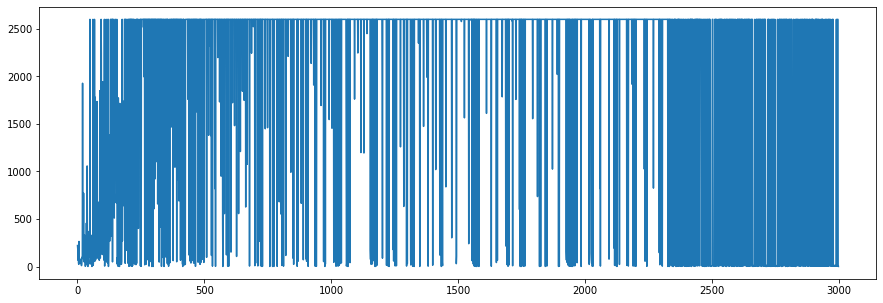

In [22]:
trials = [m['trial'] for m in metric_exploit]
steps = [m['steps_in_trial'] for m in metric_exploit]
plt.figure(figsize=(15,5))
plt.plot(trials, steps)

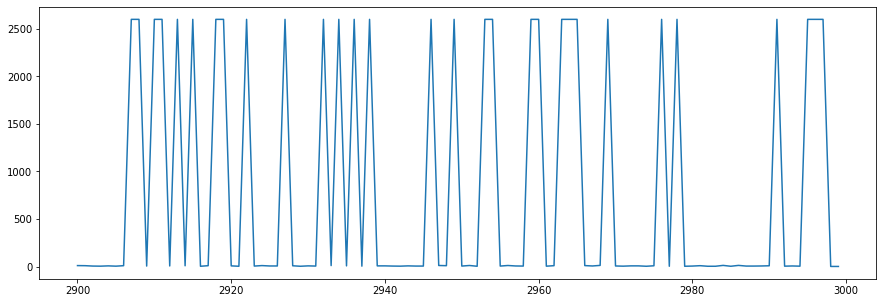

In [23]:
plt.figure(figsize=(15,5))
plt.plot(trials[-100:], steps[-100:])

In [24]:
len(steps[-5:])

5